# SIR model

**SIR (Susceptible-Infectious-Recovered) model** is one of the most common and the simplest model structure to describe the transmission of diseases. We'll go through how the model is defined, and how we can implement them in Python. We also cover relevant epidemiological concepts such as epidemical threshold.


## Model definition

### Introduction

How can we mathematically model the dynamics of disease transmission? The most common approach is to use the **compartmental models**, which we stratify the population into subgroups (compartments) and describe the changes of incoming and outgoing individuals between each compartments.

Although there could be numerous ways to setup compartments, let us start with the **SIR (Susceptible-Infectious-Recovered) model** which is one of the most common model with the simplest structure. In the SIR model, the population is stratified into three compartments:
- **S-compartment**: susceptible to new infections
- **I-compartment**: currently infected
- **R-compartment**: have recovered from infection and acquired immunity


### Various types of models

There are variations in how we mathematically represent or computationally implement the SIR model. Here are some of the perspectives that we can classify the models into. 

**Deterministic vs. Stochastic**
- **Deterministic models**: The results are deterministic, meaning that same values would be obtained even if the calculation is repeated. Useful to understand general dynamics of epidemic. Typically represented by difference or differential equations.
- **Stochastic models**: Incorporates uncertainty/randomness. Even with the same parameter values, the epidemic could either take off or extinct due to the stochasticity. If we run simulations for a sufficient enough iterations and take its mean, it should provide a close value to that was obtained from the deterministic model.

**Discrete time vs. Continuous time**
- **Discrete time model**: The timesteps are represented in discrete steps ($t=0,1,2,\cdots$).
- **Continuous time mode**: The model assumes that the changes in the system occur continuously over time.

**Mixing assumptions**
- **Homogeneous mixing model**: The model assumes that all of the individuals have a equal chance/probability of contacting with each other.
- **Heterogeneous mixing model**: Unlike homogeneous mixing, the contact patterns are quantitatively/qualitatively different in each individuals. For example, there could be some people who meets 20 people a day, whereas some people only meets 3. This is what is often called as the "network model," which we will cover in the later section.


### Discrete time SIR model

At a discrete time step (e.g., $t=0,1,2,\cdots$), the SIR model is epresented using a set of difference equations as follows,


$$
\begin{equation*}
   \left\{
    \begin{aligned}
S_{t+1} &= S_t - \beta \frac{I_t}{N} S_t \\
I_{t+1} &= I_t + \beta \frac{I_t}{N} S_t - \mu I_t \\
R_{t+1} &= R_t + \mu I_t
      \end{aligned}
   \right.
   \tag{1}
\end{equation*}
$$

where each symbols represent:
- $ S_t $: Number of susceptible individuals at time $ t$ 
- $ I_t $: Number of infected individuals at time $ t$ 
- $ R_t $: Number of recovered individuals at time $ t$ 
- $ N = S_t + I_t + R_t $: Total population
- $ \beta $: Rate of infection rate per contact
- $ \mu $: Rate of recovery.

This is a deterministic model in a discrete time step with the assumption of homogeneous mixing.

Note that the symbols of the parameters $\beta$ and $\mu$ could be different depending on the literature. We'll stick to this expression in this section unless otherwise noted.

### Continuous time SIR model

Let us think of the continuous time version of the SIR model, which can be derived from the set of difference equations above.

For a small time step $\Delta t$, the change in a variable can be approximated by the difference between successive time steps. For any variable $X$, the following approximation holds:

$$
\frac{dX}{dt} \approx \frac{X_{t+1} - X_t}{\Delta t}.
$$

If we assume $\Delta t = 1$, the difference equations become:

$$
\begin{aligned}
    \frac{S_{t+1} - S_t}{\Delta t} &\approx -\beta \frac{I_t}{N} S_t \\
    \frac{I_{t+1} - I_t}{\Delta t} &\approx \beta \frac{I_t}{N} S_t - \mu I_t \\
    \frac{R_{t+1} - R_t}{\Delta t} &\approx \mu I_t
\end{aligned}
$$

Taking the limit as $\Delta t \to 0$, the left hand side of the equations becomes the derivative. Now, denoting the number of individuals in each compartments at time $t$ in a continuous timestep as $ S(t) $, $ I(t) $, and $ R(t) $, respectively, we get a set of differential equations:

$$
\begin{equation*}
   \left\{
    \begin{aligned}
    \frac{dS(t)}{dt} &= -\beta \frac{I(t)}{N}S(t) \\
    \frac{dI(t)}{dt} &= \beta \frac{I(t)}{N}S(t) - \mu I(t) \\
    \frac{dR(t)}{dt} &= \mu I(t)
      \end{aligned}
   \right.
   \tag{2}
\end{equation*}
$$

This is a deterministic model in a continuous time step with the assumption of homogeneous mixing.


### Solving SIR model

SIR model is a nonlinear dynamical system and thus cannot be solved analytically for most settings. However, under specific assumptions, the approximate solution can analytically be derived as follows for the **very initial phase of the outbreak**.

In the early phase of an epidemic, only a small number of individuals are infected. Thus, the following approximation holds:
$$
S(t) \approx S(0) \approx N
$$
where $N$ is the total population.

With the assumption above on the susceptible population, the equation for $I(t)$ becomes:
$$
\begin{aligned}
  \frac{dI(t)}{dt}
    &= \beta \frac{I(t)}{N}S(t) - \mu I(t) \\
    &\approx \beta \frac{I(t)}{N}N - \mu I(t) \\
    &= (\beta - \mu) I(t)
\end{aligned}
$$

Since this is a first-order linear differential equation, we can solve it as
$$
\begin{aligned}
  \frac{1}{I(t)}\frac{dI(t)}{dt} &= (\beta - \mu) \\
  \int_{I(0)}^{I(t)} \frac{1}{I}dI &= \int_0^t (\beta - \mu)  {dt} \\
  \bigg[ \ln I \bigg]_{I(0)}^{I(t)} &= \bigg[ (\beta - \mu) u \bigg]_0^t \\
  \ln I(t) - \ln I(0) &= (\beta - \mu) t \\
  \ln \frac{I(t)}{I(0)} &= (\beta - \mu) t \\
\end{aligned}
$$

Taking exponent of both sides,

$$
\frac{I(t)}{I(0)} = \exp \bigg( (\beta - \mu) t \bigg)
$$

Thus we get

$$
\begin{aligned}
  I(t) = I(0) \exp \bigg( (\beta - \mu) t \bigg) \tag{3}
\end{aligned}
$$
where $I(0)$ is the initial number of infected individuals.

Note that this approximation only holds for
- the **initial phase** of epidemic
- where almost **entire population is susceptible**

### Epidemic threshold
Equation (3) is a exponential function and its behaviour depends on the the power it has:
- **Exponential Growth:** If $\beta - \mu > 0$, the infection grows exponentially.
- **Exponential Decay:** If $\beta - \mu < 0$ (or $\frac{\beta}{\mu} < 1$), the infection decays (decreases) exponentially.

Due to the threshold property of determining the growth of epidemic, we call the following relationship as the **epidemic threshold**:
$$
\beta - \mu > 0 \iff R_0 = \frac{\beta}{\mu} > 1
$$

The fractional form $\frac{\beta}{\mu}$ is also known as the **basic reproduction number** $R_0$.

### Basic reproduction number

Basic reproduction number $R_0$ (pronounced "R-naught") is the average number of secondary infections made by a single infected case when the population is fully susceptible. If the offspring distribution is given or infered, $R_0$ can be calculated as the first moment (mean) of the distribution.

In the homogeneous SIR model, $R_0$ is expressed as:
$$
R_0 = \frac{\beta}{\mu}
$$


For respiratory emerging diseases including SARS-CoV-2, the offspring distribution is known to be modeled well by the negative binomial distribution $\textrm{NegBin}(R_0, k)$ where $k$ is the dispersion parameter. Dispersion parameter $k$ for SARS-CoV-2 is known to be very small (around $k \approx 0.1$), which indicates the highly heterogeneous distribution (i.e., overdispersion) of the number of secondary transmissions.

Also note that the formula for $R_0$ is different when we assume heterogeneous mixing (in the network).


In [201]:
def calc_R0_homogeneous(beta, gamma):
    return beta/gamma

In [202]:
calc_R0_homogeneous(beta=0.4, gamma=0.2)

2.0

## Implementations

Let's try implementing the SIR model in Python. Specifically, we will code
- deterministic model with homogeneous mixing assumption
- stochastic model with homogeneous mixing assumption

and observe that the two models provide approximately same result in average.

### Notebook setup

In [203]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
from tqdm import tqdm, trange
import cmocean

In [204]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.usetex'] = False 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

### Paremeters
Here are the parameters that we use throughout the simulations.

In [205]:
params = {
    "N": 50000, # Total population size
    "n_steps": 1000, # Number of time steps
    "beta": 0.2, # Infection rate
    "gamma": 0.1, # Recovery rate
    "n_stoc_sim": 20, # Number of stochastic simulations
}
params["I_initial"] = 20 # Initial number of infected individuals
params["R_initial"] = 0 # Initial number of recovered individuals
params["S_initial"] = params["N"] - (params["I_initial"] + params["R_initial"])
params

{'N': 50000,
 'n_steps': 1000,
 'beta': 0.2,
 'gamma': 0.1,
 'n_stoc_sim': 20,
 'I_initial': 20,
 'R_initial': 0,
 'S_initial': 49980}

### Deterministic model

In [206]:
def SIR_model(S_initial=1000, I_initial=1, R_initial=0, n_steps=1000, beta=0.8, gamma=0.4):
    """
    Simulate SIR model.

    Parameters
    ----------
    S_initial : int
        Initial number of Susceptible individuals.
    I_initial : int
        Initial number of Infected individuals.
    R_initial : int
        Initial number of Recovered individuals.
    n_steps : int
        Number of time steps to simulate.
    beta : float
        Infection rate (probability of infection on contact)
    gamma : float
        Recovery rate (probability of recovery per unit time)
    
    Returns
    -------
    S_dict : dict
        Dictionary with number of susceptible individuals at each time step.
        {t: S_t, ... }
    I_dict : dict
        Dictionary with number of infected individuals at each time step.
        {t: I_t, ... }
    R_dict : dict
        Dictionary with number of recovered individuals at each time step.
        {t: R_t, ... }
    """

    # Set S,I,R to initial values
    S = S_initial
    I = I_initial
    R = R_initial

    # N is always constant
    N = S+I+R

    # Initialize dictionaries to store values
    # {t: S_t, ... } etc.
    # t=0 is the initial state
    S_dict = {0: S}
    I_dict = {0: I}
    R_dict = {0: R}

    # Start simulation from t=1 to t=n_steps
    for t in range(1, n_steps+1):

        # Calculate number of individuals for each compartment at next time step
        S_new = S - S*beta*(I/N)
        I_new = I + S*beta*(I/N) - gamma*I
        R_new = R + gamma*I

        # Store values
        S_dict[t] = S_new
        I_dict[t] = I_new
        R_dict[t] = R_new

        # Update values for next time step
        S = S_new
        I = I_new
        R = R_new

    return S_dict, I_dict, R_dict

In [207]:
S_determ, I_determ, R_determ = SIR_model(
    S_initial=params["S_initial"],
    I_initial=params["I_initial"],
    R_initial=params["R_initial"],
    n_steps=params["n_steps"],
    beta=params["beta"],
    gamma=params["gamma"]
)

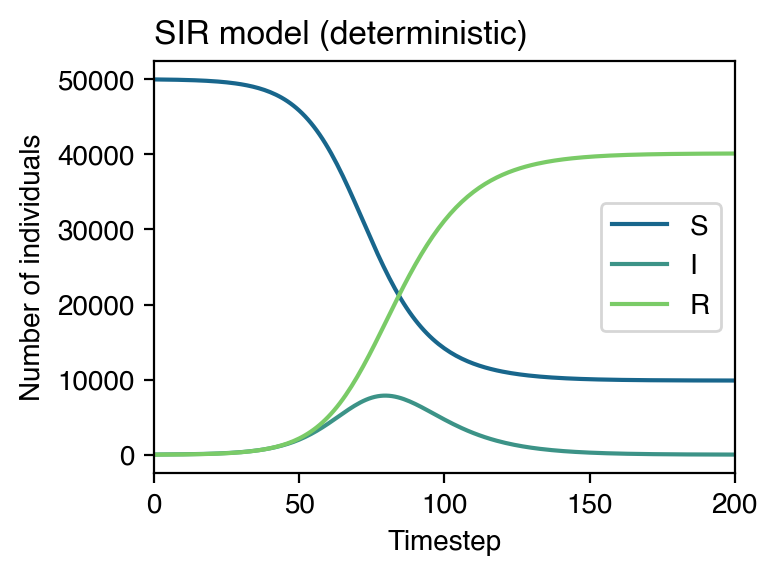

In [208]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

# Color mapping
cmap = cmocean.cm.haline
colors = [cmap(0.3), cmap(0.5), cmap(0.75)]

compartments_to_plot = ["S", "I", "R"]

data_determ = {
	"S": S_determ,
	"I": I_determ,
	"R": R_determ
}

for idx, compartment in enumerate(compartments_to_plot):
	ax.plot(
		data_determ[compartment].keys(),
		data_determ[compartment].values(),
		color=colors[idx],
		label=f'{compartment}'
	)
ax.set_title("SIR model (deterministic)", loc='left')
ax.set_xlabel("Timestep")
ax.set_ylabel("Number of individuals")

ax.set_xlim(0,200)

ax.legend()

fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()

### Stochastic model

In [209]:
def SIR_model_stochastic(S_initial=1000, I_initial=1, R_initial=0, n_steps=1000, beta=0.8, gamma=0.4):
    """
    Simulate SIR model.

    Parameters
    ----------
    S_initial : int
        Initial number of Susceptible individuals.
    I_initial : int
        Initial number of Infected individuals.
    R_initial : int
        Initial number of Recovered individuals.
    n_steps : int
        Number of time steps to simulate.
    beta : float
        Infection rate (probability of infection on contact)
    gamma : float
        Recovery rate (probability of recovery per unit time)
    
    Returns
    -------
    S_dict : dict
        Dictionary with number of susceptible individuals at each time step.
        {t: S_t, ... }
    I_dict : dict
        Dictionary with number of infected individuals at each time step.
        {t: I_t, ... }
    R_dict : dict
        Dictionary with number of recovered individuals at each time step.
        {t: R_t, ... }
    """

    # Set S,I,R to initial values
    S = S_initial
    I = I_initial
    R = R_initial

    # N is always constant
    N = S+I+R

    # Initialize dictionaries to store values
    # {t: S_t, ... } etc.
    # t=0 is the initial state
    S_dict = {0: S}
    I_dict = {0: I}
    R_dict = {0: R}

    # Start simulation from t=1 to t=n_steps
    for t in range(1, n_steps+1):

        # Calculate number of individuals for each compartment at next time step
        lambda_t = beta*(I/N)

        S_diff = np.random.binomial(S, lambda_t)
        I_diff = np.random.binomial(I, gamma)

        S_new = S - S_diff
        I_new = I + S_diff - I_diff
        R_new = R + I_diff

        # Store values
        S_dict[t] = S_new
        I_dict[t] = I_new
        R_dict[t] = R_new

        # Update values for next time step
        S = S_new
        I = I_new
        R = R_new

    return S_dict, I_dict, R_dict

In [210]:
# This is a single determination
S_stoc, I_stoc, R_stoc = SIR_model_stochastic(
    S_initial=params["N"],
    I_initial=params["I_initial"],
    R_initial=params["R_initial"],
    n_steps=params["n_steps"],
    beta=params["beta"],
    gamma=params["gamma"]
)

In [211]:
# We'll repeat the stochastic simulation for multiple times.

# Each determination will be added to the array
S_stoc_dict, I_stoc_dict, R_stoc_dict = [], [], []

for _ in trange(params["n_stoc_sim"]):
    S_stoc, I_stoc, R_stoc = SIR_model_stochastic(
		S_initial=params["S_initial"],
		I_initial=params["I_initial"],
		R_initial=params["R_initial"],
		n_steps=params["n_steps"],
		beta=params["beta"],
		gamma=params["gamma"]
    )

    S_stoc_dict.append(S_stoc)
    I_stoc_dict.append(I_stoc)
    R_stoc_dict.append(R_stoc)


100%|██████████| 20/20 [00:00<00:00, 1020.72it/s]


In [212]:
# Reorganize data into a list of dictionaries, so that it can be converted into a dataframe.
data_stoc_sim = []
for id, _ in enumerate(S_stoc_dict):
    for t, _ in S_stoc_dict[id].items():
        data_stoc_sim.append(
            {
                'iter': id,
                'time': t,
                'S': S_stoc_dict[id][t],
                'I': I_stoc_dict[id][t],
                'R': R_stoc_dict[id][t]
            }
        )

In [213]:
df_stochastic = pd.DataFrame(data_stoc_sim)
df_stochastic

,iter,time,S,I,R
0,0,0,49980,20,0
1,0,1,49979,19,2
2,0,2,49970,27,3
3,0,3,49967,28,5
4,0,4,49963,31,6
...,...,...,...,...,...
20015,19,996,9878,0,40122
20016,19,997,9878,0,40122
20017,19,998,9878,0,40122
20018,19,999,9878,0,40122


In [214]:
# Because we are dealing with multiple realizations, we'll calculate the interquantile range (25-percentile and 75-percentile)
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

In [215]:
# Groupby "time" and get the median and IQR
df_stochastic.groupby('time')['S'].agg(["median", q25, q75])

,median,q25,q75
time,,,
0,49980.0,49980.00,49980.0
1,49977.0,49975.00,49978.0
2,49973.0,49970.00,49975.0
3,49968.0,49964.75,49971.0
4,49963.0,49958.75,49966.0
...,...,...,...
996,9851.0,9688.75,9998.5
997,9851.0,9688.75,9998.5
998,9851.0,9688.75,9998.5


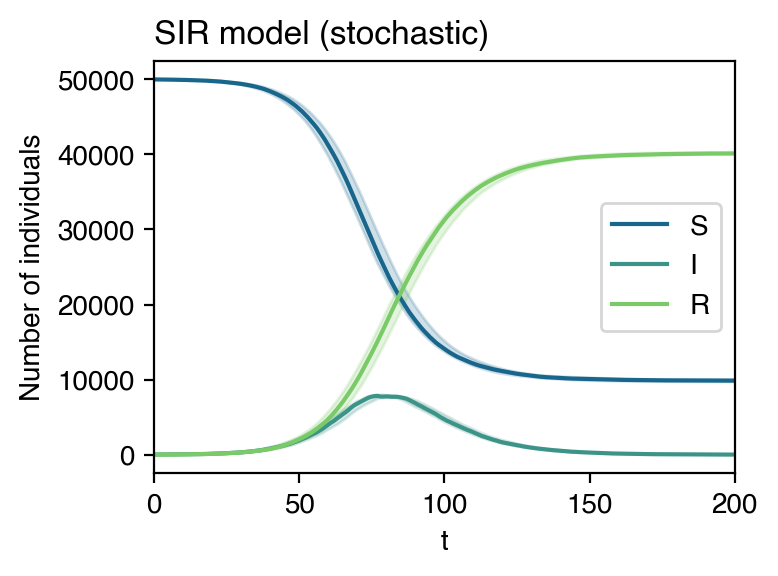

In [216]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

compartments_to_plot = ["S", "I", "R"]

for idx, compartment in enumerate(compartments_to_plot):

	quantiles = df_stochastic.groupby('time')[compartment].agg(["median", q25, q75])

	# Median
	ax.plot(
		quantiles.index,
		quantiles['median'],
		color=colors[idx],
		label=f'{compartment}'
	)

	# IQR
	ax.fill_between(
		quantiles.index,
		quantiles['q25'],
		quantiles['q75'],
		color=colors[idx],
		alpha=0.2,
	)

ax.set_title("SIR model (stochastic)", loc='left')
ax.set_xlabel("t")
ax.set_ylabel("Number of individuals")

ax.set_xlim(0,200)

ax.legend()


fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()

### Comparison

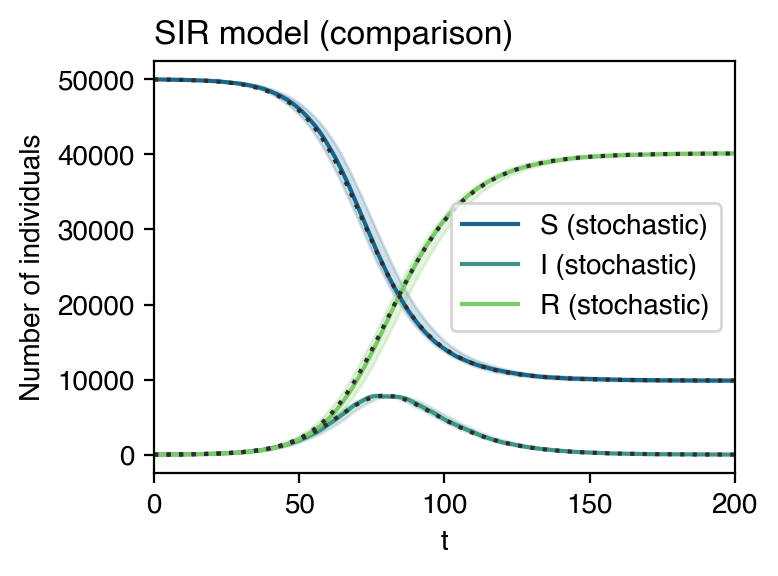

In [217]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

compartments_to_plot = ["S", "I", "R"]

# === Stochastic simulation ===
for idx, compartment in enumerate(compartments_to_plot):

	quantiles = df_stochastic.groupby('time')[compartment].agg(["median", q25, q75])

	# Median
	ax.plot(
		quantiles.index,
		quantiles['median'],
		color=colors[idx],
		label=f'{compartment} (stochastic)'
	)

	# IQR
	ax.fill_between(
		quantiles.index,
		quantiles['q25'],
		quantiles['q75'],
		color=colors[idx],
		alpha=0.2,
	)

# === Deterministic result ===
for idx, compartment in enumerate(compartments_to_plot):
	
	ax.plot(
		data_determ[compartment].keys(),
		data_determ[compartment].values(),
		linestyle=(0,(1,2)),
		color="#2e2e2e",
	)

ax.set_title("SIR model (comparison)", loc='left')
ax.set_xlabel("t")
ax.set_ylabel("Number of individuals")

ax.set_xlim(0,200)


ax.legend()

fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()

## Epidemic threshold

### Final size equation

#### Definition

We define the **final size** $z$ as the proportion of cumulative infected individuals in the entire population for $t \to \infty$, which is
$$
z = \frac{R_\infty}{N}
$$
where $R_\infty$ is the number of recovered individual at $t \to \infty$ and $N$ is the size of the entire population.

The final size $z$ follows the relationship below:
$$
z = 1 - \exp (- R_0 z)
$$
where $R_0$ is the basic reproduction number. This equation is known as the **final size equation**.

#### Derivation

Let us derive the final equation. We first start with the set of SIR differential equations.
$$
\begin{equation*}
   \left\{
    \begin{aligned}
    \frac{dS(t)}{dt} &= -\beta \frac{I(t)}{N}S(t) \\
    \frac{dI(t)}{dt} &= \beta \frac{I(t)}{N}S(t) - \mu I(t) \\
    \frac{dR(t)}{dt} &= \mu I(t)
      \end{aligned}
   \right.
\end{equation*}
$$

Notice that $I$ appears in both $\frac{dS(t)}{dt}$ and $\frac{dR(t)}{dt}$. By eliminating $I$, we form a differential relation between $R$ and $S$.
Dividing $\frac{dR(t)}{dt}$ by $\frac{dS(t)}{dt}$, we get

$$
\begin{aligned}
\frac{dR(t)}{dS(t)}
&= \frac{\frac{dR(t)}{dt}}{\frac{dS(t)}{dt}} \\
&= \frac{\mu I(t)}{-\beta \frac{I(t)}{N}S(t)}  \\
&= -\frac{\mu N}{\beta S(t)}.
\end{aligned}
$$

Since the basic reproduction number is $R_0 = \frac{\beta}{\mu}$,
$$
\frac{dR(t)}{dS(t)} = -\frac{N}{R_0 S(t)},
$$

Rearranging the equation, we get
$$
dR(t)= -\frac{N}{R_0} \frac{dS(t)}{S}.
$$

By integrating both sides with t from $t=0$ to $t \to \infty$,

$$
\int_{R(0)}^{R(\infty)} dR(u) = -\frac{N}{R_0} \int_{S(0)}^{S(\infty)} \frac{dS(u)}{S}
$$

Note that following relationship holds:
- At $t=0$, $R(0)=0$ and $S(0)=S_0$
- At $t \to \infty$, $R(\infty)=R_\infty$ and $S(\infty)=S_\infty$

We get
$$
\begin{aligned}
R_\infty
&= -\frac{N}{R_0} \bigg[ \ln S \bigg] _{S_0}^{S_\infty} \\
&= -\frac{N}{R_0} \left( \ln S_\infty - \ln S_0 \right) \\
&= -\frac{N}{R_0} \ln \frac{S_\infty}{S_0} \\
&= \frac{N}{R_0} \ln \frac{S_0}{S_\infty}
\end{aligned}
$$

Since the total population is conserved, we have:
$$
N = S_\infty + I(\infty) + R_\infty
$$

At the end of the epidemic, $I(\infty) \approx 0$, so:
$$
N = S_\infty  + R_\infty \\
S_\infty = N - R_\infty
$$

Substitute this into the previous equation:
$$
R_\infty = \frac{N}{R_0} \ln \frac{S_0}{N - R_\infty}
$$

Assuming that almost the entire population is susceptible at $t=0$, i.e., $S_0 \approx N$,
$$
R_\infty = \frac{N}{R_0} \ln \frac{N}{N - R_\infty}
$$

Dividing through by $N$ gives:
$$
\frac{R_\infty}{N} = \frac{1}{R_0} \ln \frac{1}{1 - \frac{R_\infty}{N}}
$$

Now, let $z = \frac{R_\infty}{N}$ which is the fraction of the cumulative population that were infected at $t \to \infty$. The equation becomes
$$
\begin{aligned}
z
&= \frac{1}{R_0} \ln \frac{1}{1 - z} \\
&= \frac{1}{R_0} \bigg( \ln 1 - \ln (1-z) \bigg) \\
&= - \frac{1}{R_0} \ln (1-z) \\
\end{aligned}
$$

Multiplying by $R_0$ and taking exponent on both sides, we get
$$
\begin{aligned}
R_0 z &= -  \ln (1-z) \\
\exp( - R_0 z ) &= 1-z
\end{aligned}
$$

Rewriting the equation, we finally get the final size equation for the SIR model as:

$$
z = 1 - \exp( - R_0 z ) \tag{1}
$$

Now, let $s = \frac{s_\infty}{N}$ which is the fraction of the susceptible population at $t \to \infty$, where $s = 1 - z$ holds. The final size equation can also be written as:

$$
1-s = 1 - \exp( - R_0 (1-s) )
$$

$$
s = \exp( - R_0 (1-s) )  \tag{2}
$$



### Threshold in theory
Now, let's solve the final size equation for $z$, both analytically and numerically.

In [218]:
# Define functions to compute Z numerically and analytically

from scipy.optimize import root_scalar
from scipy.special import lambertw

def final_size_equation(z, R0):
    """
    Final size equation in the SIR model.
    This function represents the equation z = 1 - exp(-R0 * z).
    """
    # LHS - RHS = 0
    return z - (1 - np.exp(-R0 * z)) 

def calc_Z_numerically(R0):
    """
    Compute z numerically using the root-finding method.
    This function uses the Brent's method to find the root of the final size equation.
    Since the equation has multiple solutions for z in R≥1, we set the range for the solution to [1e-6, 1.0] to find the non-trivial solution and avoid trivial solutions (z=0).

    Parameters:
    R0 (float or numpy.ndarray): The basic reproduction number(s).

    Returns:
    float: The computed value of Z for the given R0.
    """
    if R0 <= 1:
        return 0.0
    result = root_scalar(
        final_size_equation,
        args=(R0,),
        bracket=[1e-6, 1.0], # Set range for solution. 
        method='brentq'
    )
    return result.root if result.converged else np.nan

def calc_Z_analytically(R0):
    """
    Compute Z analytically using Lambert W function.
    For R0 > 0, Z = 1 + (1/R0) * W(-R0 * exp(-R0)), taking the principal branch.

    Parameters:
    R0 (float or numpy.ndarray): The basic reproduction number(s).

    Returns:
    float or numpy.ndarray: The corresponding value(s) of Z.
    """
    if R0 <= 0:
        return 0.0
    return 1 + (1 / R0) * lambertw(-R0 * np.exp(-R0)).real


In [219]:
# Range for R0
R0_values = np.linspace(0.0, 3.0, 200)

# Calculate Z values for both numerical and analytical methods
Z_values_numerical = [calc_Z_numerically(R0) for R0 in R0_values] # Z values calculated numerically for each R0
Z_values_analytical = [calc_Z_analytically(R0) for R0 in R0_values] # Z values calculated analytically for each R0

The figure below compares the the numerical and analytical solutions of $z$ value. We observe that the final size $z$ is zero for $R_0<1$, and experiences a phase transision at $R_0=1$, showing the threshold property.

In other words, $R_0 ≥ 1$ has to hold for an outbreak to take off.

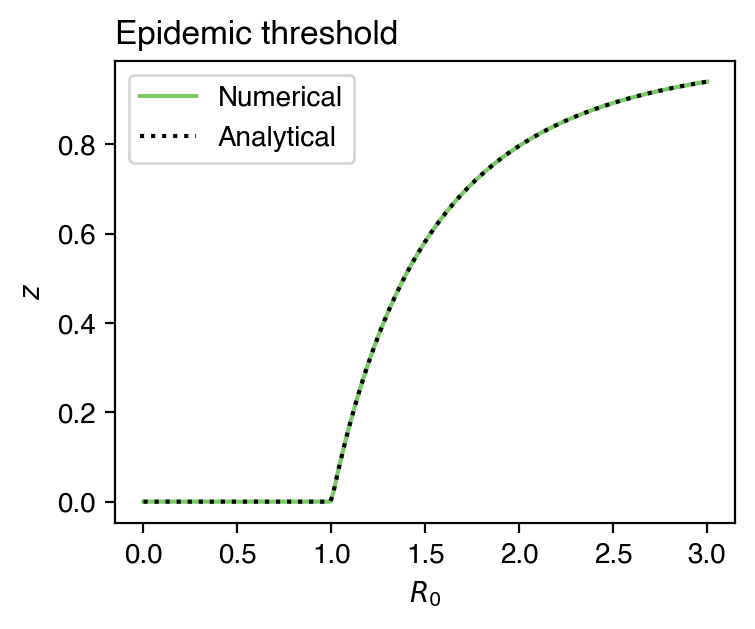

In [237]:
# Compare the results from numerical and analytical methods
fig, ax = plt.subplots(1,1, figsize=(4,3))

ax.plot(
	R0_values,
	Z_values_analytical,
    color=colors[2],
	label='Numerical'
)
ax.plot(
	R0_values,
	Z_values_analytical,
	':',
    color='black',
    label='Analytical'
)

ax.set_xlabel(r'$R_0$')
ax.set_ylabel(r'$z$')
ax.set_title(r'Epidemic threshold', loc='left')

ax.legend()

plt.show()


Now, recall that we had to set a range of solution for $z$ in the `calc_Z_numerically(R0)` function above. This is because there is a trivial solution (z=0) besides the non-trivial solution that we want to solve for. Here, we'll make an animation plotting two functions below to observe the solutions (point of intersection) as we change the value of $R_0$.

$$
\begin{equation*}
   \left\{
    \begin{aligned}
        y &= z \\
        y &= 1 - \exp(-R_0 z)
    \end{aligned}
   \right.
\end{equation*}
$$



In [221]:
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
colors_cbfp = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

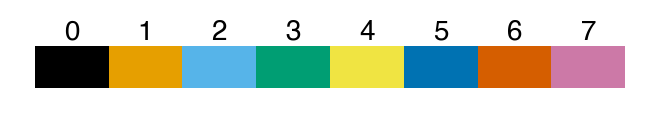

In [222]:
# Create figure with 1 subplot
square_size = 0.5  # Size of each square
fig_width = len(colors_cbfp) * square_size
fig_height = square_size
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set white background
fig.set_facecolor('white')
ax.set_facecolor('white')

# Plot squares with colors from colors_cbfp with some spacing between them
for i, color in enumerate(colors_cbfp):
    rect = plt.Rectangle((i*square_size, 0), square_size, square_size, 
                        facecolor=color, edgecolor='none')
    ax.add_patch(rect)
    # Add index number on top of rectangle
    ax.text(i*square_size + square_size/2, square_size, str(i), 
            horizontalalignment='center', verticalalignment='bottom')

# Clean up the plot
ax.set_xlim(-0.1, len(colors_cbfp)*square_size + 0.1)
ax.set_ylim(-0.1, square_size + 0.3)  # Extra space for numbers
ax.axis('off')

plt.show()


In [223]:
import matplotlib.animation as animation

Z_values_ani = np.linspace(-0.1, 1.05, 500) # Z-value for animation plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Left: Intersection of two functions
line1, = ax1.plot([], [], label=r"$y = z$", color=colors_cbfp[5])
line2, = ax1.plot([], [], label=r"$y = 1 - \exp(- R_0 z)$", color=colors_cbfp[2])
point_trivial, = ax1.plot([], [], 'o', color=colors_cbfp[1], label="Trivial ($z=0$)")
point_nontrivial, = ax1.plot([], [], 'o', color=colors_cbfp[7], label=r"Nontrivial ($\hat{z}$)")
title = ax1.text(0, 1.02, "", transform=ax1.transAxes, ha="left")
ax1.set_xlim(-0.05, 1.05)
ax1.set_ylim(-0.05, 1.05)
ax1.set_xlabel("$z$")
ax1.set_ylabel("$y$")
ax1.legend(fontsize=8)

# Right: Z vs R0
ax2.plot(R0_values, Z_values_numerical, '-', color="black")
point_current, = ax2.plot([], [], 'o', color=colors_cbfp[7], label=r"$\hat{z}$ (current)")
ax2.set_xlim(-0.05, 3.05)
ax2.set_ylim(-0.05, 1.05)
ax2.set_xlabel(r"$R_0$")
ax2.set_ylabel(r"$z$")
ax2.legend(fontsize=8, loc='upper left')

def init_finalsize_animation():
    line1.set_data([], [])
    line2.set_data([], [])
    point_trivial.set_data([], [])
    point_nontrivial.set_data([], [])
    point_current.set_data([], [])
    title.set_text("")
    return line1, line2, point_trivial, point_nontrivial, point_current, title

def animate_finalsize(i):
    R0 = R0_values[i]
    y1 =Z_values_ani 
    y2 = 1 - np.exp(-R0 * Z_values_ani)
    Z_star = Z_values_numerical[i]

    line1.set_data(Z_values_ani, y1)
    line2.set_data(Z_values_ani, y2)
    point_trivial.set_data([0], [0])
    point_nontrivial.set_data([Z_star], [Z_star])
    point_current.set_data([R0], [Z_star])
    title.set_text(f"$R_0$ = {R0:.2f}")

    return line1, line2, point_trivial, point_nontrivial, point_current, title

ani = animation.FuncAnimation(
    fig, animate_finalsize, frames=len(R0_values), init_func=init_finalsize_animation,
    blit=True, interval=100, repeat=False
)

plt.close(fig)

In [224]:
def show_animation_img_base64(ani, dpi=200, type="gif"):
    """
    Display the animation as a GIF/APNG in Jupyter Notebook.
    
    Parameters:
    ani : FuncAnimation
        The animation object to display.
    dpi : int
        Dots per inch for the saved image. Default is 200.
    type : str
        The type of image format to display. Options are "gif" or "apng".
        Default is "gif". Note: "apng" requires the `imageio` package.
    
    Returns:
    None
    """
    # from IPython.display import Image
    from IPython.display import HTML
    import base64
    import tempfile

    suffix_dict = {"gif": ".gif", "apng": ".apng"}
    mimetype_dict = {"gif": "image/gif", "apng": "image/vnd.mozilla.apng"}

    # Use a temporary file to save the GIF
    with tempfile.NamedTemporaryFile(suffix=suffix_dict[type], delete=False) as tmpfile:
        tmp_path = tmpfile.name
    ani.save(tmp_path, writer='pillow', fps=20, dpi=dpi)

    # Encode image to base64 and print as HTML with <img> tag
    with open(tmp_path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")

    html = f'<img src="data:image/{mimetype_dict[type]};base64,{b64}" />'
    display(HTML(html))

In [194]:
def show_animation_video_base64(ani, dpi=200, type="mp4", autoplay=True, control=True, loop=True):
    """
    Display the animation as an MP4 video in Jupyter Notebook using base64 embedding.
    
    Parameters:
    ani : FuncAnimation
        The animation object to display.
    dpi : int
        Dots per inch for the saved video. Default is 200.
    
    Returns:
    None
    """
    from IPython.display import HTML, display
    import base64
    import tempfile

    suffix_dict = {"mp4": ".mp4", "webm": ".webm"}
    mimetype_dict = {"mp4": "video/mp4", "webm": "video/webm"}

    # Create a temporary file with .mp4 extension
    with tempfile.NamedTemporaryFile(suffix=suffix_dict[type], delete=False) as tmpfile:
        tmp_path = tmpfile.name

    # Save the animation to the temporary file using the 'ffmpeg' writer
    ani.save(tmp_path, writer='ffmpeg', fps=20, dpi=dpi)

    # Read the video file and encode it in base64
    with open(tmp_path, "rb") as f:
        video_data = f.read()
        b64 = base64.b64encode(video_data).decode("utf-8")

    video_tag_options = ""
    if autoplay:
        video_tag_options += "autoplay muted "
    if control:
        video_tag_options += "controls "
    if loop:
        video_tag_options += "loop "

    # Create HTML to embed the video with controls
    html = f'''
    <video playsinline {video_tag_options}>
      <source src="data:{mimetype_dict[type]};base64,{b64}" type="{mimetype_dict[type]}">
    </video>
    '''
    display(HTML(html))


In [195]:
# We use this custom function to have the animation embedded as mp4. This allows the extraction of videos when we build the document.
show_animation_video_base64(ani)

# Use this when you don't need to convert to Markdown
# HTML(ani.to_jshtml())

### Threshold in simulation

In [197]:
beta_list = np.arange(0,0.4,0.005)

In [198]:
data_final_size_determ = []

for beta in beta_list:
	_, _, R_dict = SIR_model(
		S_initial=params["S_initial"],
		I_initial=params["I_initial"],
		R_initial=params["R_initial"],
		n_steps=params["n_steps"],
		beta=beta,
		gamma=params["gamma"]
	)
	final_size = list(R_dict.values())[-1]
	data_final_size_determ.append(
		{
			'final_size': final_size,
			'beta': beta,
			'gamma': params["gamma"]
		}
	)
	# final_size_dict_determ[beta] = final_size / params["N"]

In [199]:
df_final_size_determ = pd.DataFrame(data_final_size_determ)
df_final_size_determ['final_size'] = df_final_size_determ['final_size'] / params["N"]

In [225]:
df_final_size_determ['R0'] = df_final_size_determ.apply(
    lambda d:
    	calc_R0_homogeneous(beta = d['beta'], gamma = d['gamma']),
    axis=1
)

In [226]:
# df_final_size_determ['R0'] = df_final_size_determ['beta'] / df_final_size_determ['gamma']

In [227]:
df_final_size_determ

,final_size,beta,gamma,R0
0,0.000400,0.000,0.1,0.00
1,0.000421,0.005,0.1,0.05
2,0.000444,0.010,0.1,0.10
3,0.000471,0.015,0.1,0.15
4,0.000500,0.020,0.1,0.20
...,...,...,...,...
75,0.979013,0.375,0.1,3.75
76,0.980273,0.380,0.1,3.80
77,0.981459,0.385,0.1,3.85
78,0.982573,0.390,0.1,3.90


In [228]:
data_final_size_stoc = []

# N = 50000
for beta in tqdm(beta_list):
	for it in range(params["n_stoc_sim"]):
		_, _, R_dict = SIR_model_stochastic(
			S_initial=params["S_initial"],
			I_initial=params["I_initial"],
			R_initial=params["R_initial"],
			n_steps=params["n_steps"],
			beta=beta,
			gamma=params["gamma"]
		)
		final_size = list(R_dict.values())[-1]
		data_final_size_stoc.append(
			{
				'iter': it,
				'final_size': final_size,
				'beta': beta,
				'gamma': params["gamma"]
			}
		)
	# final_size_dict_stoc[beta] = final_size / params["N"]

  0%|          | 0/80 [00:00<?, ?it/s]

100%|██████████| 80/80 [00:01<00:00, 48.82it/s]


In [229]:
df_final_size_stoc = pd.DataFrame(data_final_size_stoc)
df_final_size_stoc['final_size'] = df_final_size_stoc['final_size'] / params["N"]

In [230]:
df_final_size_stoc['R0'] = df_final_size_stoc.apply(
    lambda d:
    	calc_R0_homogeneous(beta = d['beta'], gamma = d['gamma']),
    axis=1
)

In [231]:
summary_df_final_size_stoc = df_final_size_stoc.groupby('R0')['final_size'].agg(['mean', q25, q75])

### Comparison

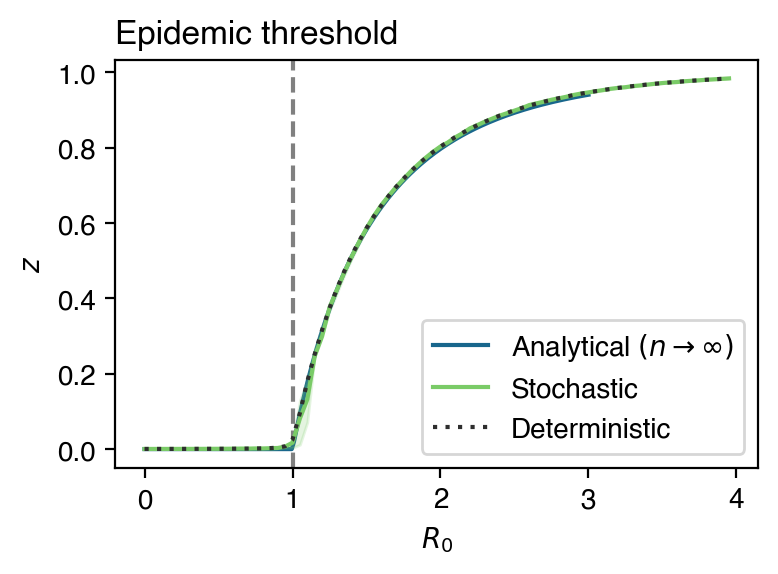

In [236]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

# Analytical solution when n-> \infty
ax.plot(R0_values, Z_values_analytical, color=colors[0], label=r'Analytical $( n \rightarrow \infty)$', zorder=-1)

# Stochastic
ax.fill_between(
    summary_df_final_size_stoc.index,
	summary_df_final_size_stoc['q25'],
	summary_df_final_size_stoc['q75'],
	color=colors[2],
    alpha=0.2,
)
ax.plot(
	summary_df_final_size_stoc.index,
	summary_df_final_size_stoc['mean'],
	color=colors[2],
    label="Stochastic",
)

# Deterministic
ax.plot(
	df_final_size_determ['R0'],
	df_final_size_determ['final_size'],
    color="#2e2e2e",
    label="Deterministic",
    linestyle=(0,(1,2))
)

# R0=1 line
ax.axvline(x=1, color='gray', linestyle='--', zorder=-10)


ax.set_title("Epidemic threshold", loc='left')
ax.set_xlabel("$R_0$")
ax.set_ylabel(r"$z$")
ax.legend()

fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()